# Fashion MNIST

## 참고 : https://www.pyimagesearch.com/2019/02/11/fashion-mnist-with-keras-and-deep-learning/

Fashion MNIST 데이터 세트는 MNIST 데이터 세트와 유사한 학습도구입니다.
Fashion MNIST 데이터 세트는 다음을 포함합니다:
 - 60,000 training examples
 - 10,000 testing examples
 - 10 classes
 - 28×28 grayscale/single channel images

10개의 패션 클라스는 다음과 같이 분류되어 있습니다:
1. T-shirt/top
2. Trouser/pants
3. Pullover shirt
4. Dress
5. Coat
6. Sandal
7. Shirt
8. Sneaker
9. Bag
10. Ankle boot

Fashion MNIST 데이터 세트는 전자 상거래 회사 인 Zalando에 의해 만들어졌습니다. 그들이 패션 MNIST 데이터 세트에 대한 공식 GitHub에서 언급했듯이, 표준 MNIST 숫자 인식 데이터 세트에는 몇 가지 문제점이 있습니다.
MNIST 데이터로 표준 머신러닝 알고리즘을 사용하여 97 % 이상의 정확도를 얻는 것은 너무 쉽습니다. 딥러닝 모델이 99 % 이상의 정확도를 달성하는 것도 쉽습니다. 즉 데이터 세트가 남용되었습니다. 또한 MNIST는 최신 컴퓨터 비전 작업을 표현할 수 없습니다.
따라서 Zalando는 MNIST의 대체품으로 Fashion MNIST 데이터 세트를 만들었습니다.
Fashion MNIST 데이터 세트는 교육 세트 크기, 테스트 세트 크기, 클래스 라벨 수 및 이미지 크기 등이 MNIST 데이터 세트와 동일합니다.
MNIST 숫자 데이터 세트를 테스트한 적이 있다면, 기본적으로 한두 줄의 코드를 변경하고 Fashion MNIST 데이터 세트에서 동일한 네트워크를 교육할 수 있습니다.
이전 MNIST 숫자 인식과 달리 본 예제에서는 OpenCV를 사용할 것입니다.
OpenCV(Open Source Computer Vision)은 인텔에서 개발한 실시간 컴퓨터 비전을 목적으로 한 프로그래밍 라이브러리입니다. 기초 영상처리서부터 고급 수준의 영상처리 까지 상당한 량의 알고리즘들이 함수로 구현되어 있는 실시간 이미지 프로세싱에 중점을 둔 라이브러리입니다.
만일 OpenCV가 설치되어 있지 않다면 pip 명령으로 설치하시기 바랍니다. Imutils도 설치해야 합니다. 반드시 onebook 가상환경에 설치하는 것을 기억하십시오.

Fashion MNIST 데이터 세트를 얻는 방법에는 두 가지가 있습니다.
Keras 딥러닝 라이브러리를 사용하는 경우, Fashion MNIST 데이터 세트는 실제로 Keras의 데이터 세트 모듈에 직접 빌드됩니다. 다른 방법으로는 공식 Fashion MNIST GitHub 저장소에서 디렉토리를 다운로드 할 수 있습니다.

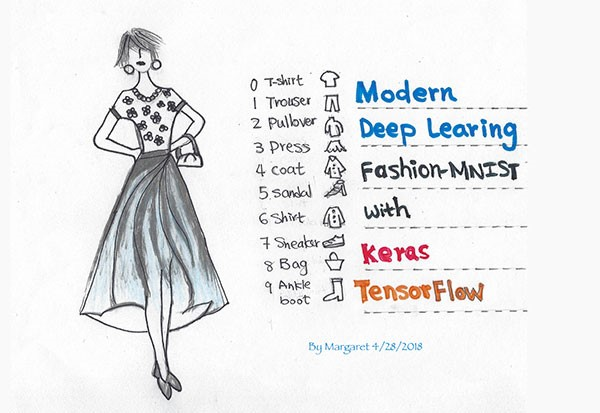

In [11]:
from IPython.display import Image
Image(filename='Fashion.jpg') 

다음처럼 텐서플로우를 사용하여 Fashion MNIST를 가져올 수 있습니다.

(train_images, train_labels)는 뉴럴 네트워크를 학습시킬때 사용하게되는  훈련 데이터셋이며 (test_images, test_labels)는 뉴럴 네트워크의 정확성을 검증하기 위한 테스트 데이터셋입니다.

In [12]:
from tensorflow import keras


fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

이미지는 28 x 28 크기의 넘파이 배열에 저장되어 있습니다. 하나의 픽셀은 0 ~ 255 사이의 값을 갖습니다.

훈련 데이터셋으로 60,000개, 테스트 데이터셋으로 10,000개를 사용합니다. 

In [13]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


라벨은 0 ~ 9 사이의 값을 갖는 정수 배열입니다. 이미지가 10개의 클래스중 어디에 속하는지를 나타냅니다.

훈련 데이터셋으로 60,000개, 테스트 데이터셋으로 10,000개를 사용합니다. 

In [14]:
print(train_labels)

print(test_labels)

[9 0 0 ... 3 0 5]
[9 2 1 ... 8 1 5]


데이터셋에는 클래스 이름이 포함되어 있지 않습니다. 그래서 다음처럼 클래스 이름을 리스트에 저장해야 합니다. 

In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터 전처리하기
뉴럴 네트워크의 입력으로 데이터셋을 사용하기 전에 전처리를 해줘야 합니다. 

현재 데이터셋에 있는 이미지는 0 ~ 255 사이의 값을 갖습니다. 

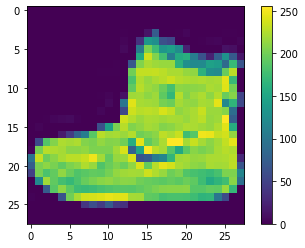

In [16]:
from tensorflow import keras
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

뉴럴 네트워크의 입력으로 데이터셋을 사용하려면 값의 범위를 0 ~ 1로 변경해줘야 합니다. 

훈련 데이터셋과 테스트 데이터셋을 현재 데이터셋의 최대값인 255로 나누어줍니다. 

In [17]:
train_images = train_images / 255.0
test_images = test_images / 255.0

모델 만들기
뉴럴 네트워크 모델을 설정합니다.



레이어 설정하기
뉴럴 네트워크를 생성하려면 추가할 레이어의 갯수를 정하고 레이어마다 추가할 노드(=뉴런) 갯수를 정해야 합니다. 

간단한 뉴럴 네트워크의 경우 입력 레이어, 은닉 레이어, 출력 레이어로 구성됩니다. 



입력 레이어는 외부의 입력을 뉴럴 네트워크로 가져오는 역활을 합니다.  

keras.layers.Flatten를 사용하여 28 x 28 크기의 이미지가 저장된 2차원 배열을 크기 784(=28*28)의 1차원 배열로 변환합니다.



은닉 레이어를 추가하고 활성화 함수로 비선형 함수를 사용함으로써 선형으로 풀지 못하던 문제를 풀 수 있게 되었습니다. (XOR 문제)  

tf.keras.layers.Dense를 사용하여 노드 갯수가 128개인 Dense 레이어를 생성합니다.  활성화 함수로 relu를 사용합니다. 

Dense 레이어는 이전 레이어의 각 노드가 현재 레이어의 모든 노드에 연결됩니다. 



출력 레이어는 뉴럴 네트워크의 출력을 외부로 출력하는 역활을 합니다. 

tf.keras.layers.Dense를 사용하여 노드 갯수가 10개인 Dense 레이어를 생성합니다. 활성화 함수로 softmax를 사용합니다.

softmax를 거치면 10개의 노드 출력값의 합이 1이 되도록 조정됩니다.  가장 큰값이 10개의 클래스중 어느 클래스에 속할지를 나타냅니다. 



In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),      # 입력 레이어
    keras.layers.Dense(128, activation=tf.nn.relu),  # 은닉 레이어
    keras.layers.Dense(10, activation=tf.nn.softmax) # 출력 레이어
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


모델 컴파일하기
모델 컴파일 단계에서 다음 3가지를 설정합니다. 



 - 손실함수(Loss function) 

학습시키는 동안 모델의 정확성을 측정하기 위해 사용되는 방법입니다. 

이 손실함수를 최소화하는 모델의 가중치를 구하게 됩니다. 



 - 옵티마이저(Optimizer) 

데이터와 손실함수를 기반으로 모델의 가중치를 업데이트하는 방법입니다. 



 - 평가 지표(Metrics)

학습 단계, 평가 단계를 모니터링하기 위해 사용하는 평가 지표입니다.

본 포스팅에서는 전체 데이터셋에서 올바르게 분류된 이미지 비율을 표시하는 정확도(accuracy)를 사용합니다. 



In [19]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 모델 학습하기
다음 단계를 걸쳐 뉴럴 네트워크 모델을 학습시킵니다.



모델에 데이터를 입력합니다. 본 포스팅의 예제에서는 train_images와 train_labels 배열입니다. 



이미지와 라벨간의 관계를 모델에 학습시킵니다. 

뉴럴 네트워크의 출력과 라벨의 차이가 줄어들도록 모델의 가중치를 업데이트하는 것을 반복합니다.



테스트 데이터셋을 사용하여 모델의 예측 정확도를 검증합니다.  

test_images를 입력으로 사용하여 예측된 결과와 라벨 test_labels이 일치하는지를 검증합니다.




model.fit 메소드를 사용하여 모델을 학습을 시킵니다.  epochs에 반복할 횟수를 지정해줍니다. 

In [20]:
model.fit(train_images, train_labels, epochs=100)

Epoch 1/100
60000/60000 [==============================] - 3s 47us/sample - loss: 0.5009 - acc: 0.8243
Epoch 2/100
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3784 - acc: 0.8637
Epoch 3/100
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3404 - acc: 0.8767
Epoch 4/100
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3146 - acc: 0.8848
Epoch 5/100
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2957 - acc: 0.8913
Epoch 6/100
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2800 - acc: 0.8962
Epoch 7/100
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2687 - acc: 0.9008
Epoch 8/100
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2581 - acc: 0.9041
Epoch 9/100
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2475 - acc: 0.9087
Epoch 10/100
60000/60000 [==============================] - 3s 45us/sampl

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.7745 - acc: 0.8885
Test accuracy: 0.8885


예측하기
학습이 완료되었습니다. 이제 새로운 이미지에 대한 예측을 할 수 있습니다. 

모델을 가지고 주어진 테스트 이미지에 대한 예측을 해봅니다.

In [22]:
predictions = model.predict(test_images)

In [23]:
print(predictions[0])

[1.9230498e-36 0.0000000e+00 3.0469407e-33 0.0000000e+00 1.9370449e-37
 3.6483776e-12 1.0422182e-30 7.0327797e-12 5.6396271e-27 1.0000000e+00]


하나의 이미지에 대한 예측은 10개의 숫자로 이루어져 있습니다. 10개의 클래스에 각각 속할 확률을 표시합니다. 

10개의 수를 더하면 합이 1이 되며 가장 높은 값을 갖는 클래스에 속하게 됩니다. 



np.argmax 함수를 사용하여 몇번째 클래스에 속하는지 숫자를 출력해볼 수 있습니다. 

In [24]:
import numpy as np

In [25]:
np.argmax(predictions[0])

9

class_names 변수에서 대응하는 값을 출력해보면 Ankle boot인 것을 알 수 있습니다. 

In [26]:
print(class_names[np.argmax(predictions[0])])

Ankle boot


In [27]:
print(test_labels[0])

9


# 참고 : 케라스 창시자에게 배우는 딥러닝

# 강아지 vs 고양이

여기서 사용할 강아지 vs. 고양이 데이터셋은 케라스에 포함되어 있지 않습니다. 컨브넷이 주류가 되기 전인 2013년 후반에 캐글에서 컴퓨터 비전 경연 대회의 일환으로 이 데이터셋을 만들었습니다. 원본 데이터셋을 https://www.kaggle.com/c/dogs-vs-cats/data에서 내려받을 수 있습니다(캐글 계정이 없다면 하나 만들어야 하지만 계정을 만드는 과정은 간단합니다). 실습의 편의를 위해서 번역서의 깃허브에는 이 데이터셋을 미리 다운로드하여 포함하였습니다.

이 사진들은 중간 정도의 해상도를 가진 컬러 JPEG 파일입니다. 다음이 몇 개 샘플입니다:

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

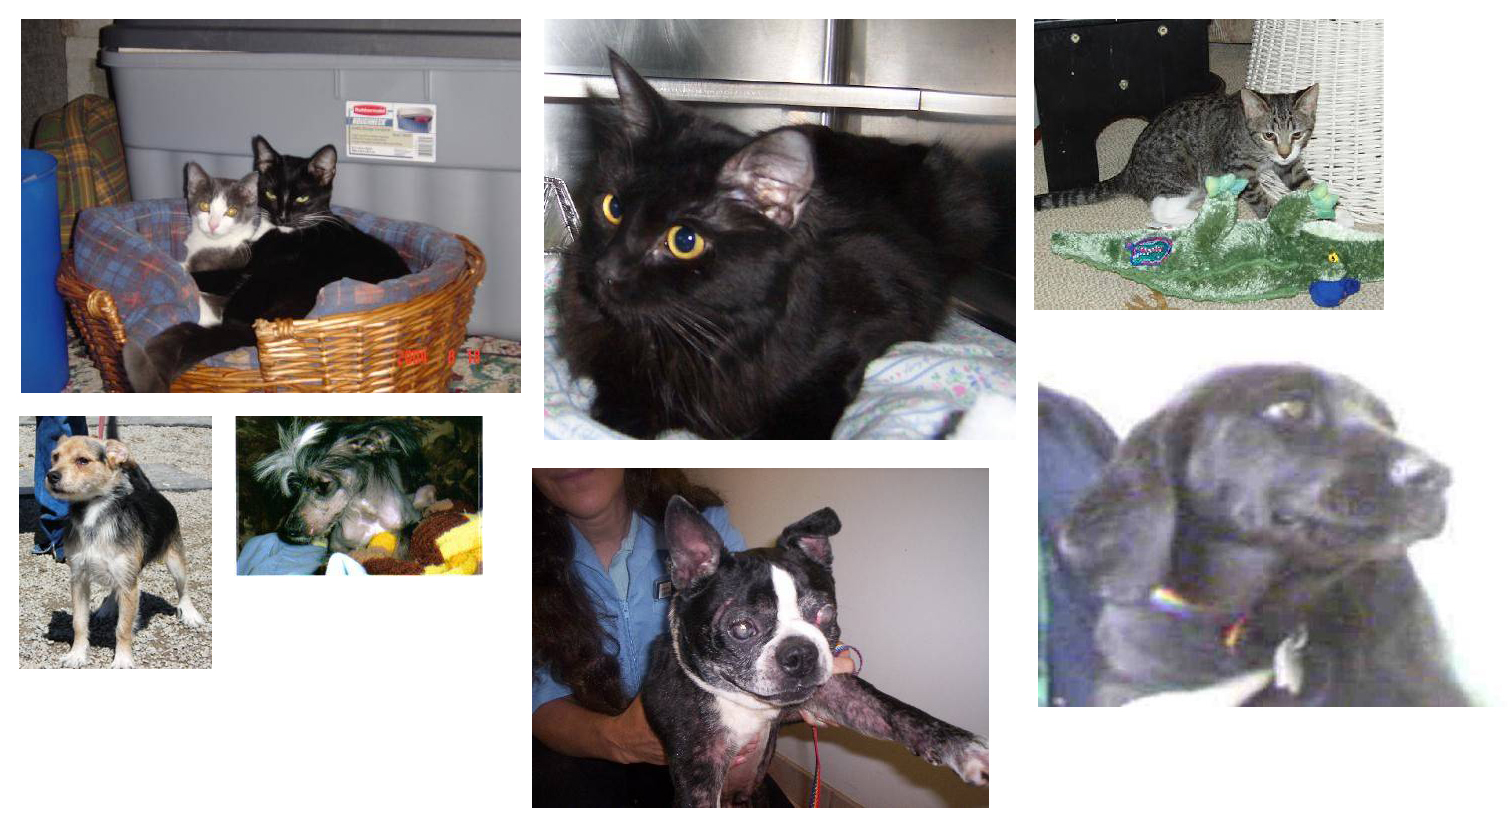

In [2]:
from IPython.display import Image
Image(filename='dog.jpg') 

당연히 2013년 강아지 vs. 고양이 캐글 경연은 컨브넷을 사용한 참가자가 우승하였습니다. 최고 성능은 95%의 정확도를 달성했습니다. 이 예제를 가지고 (다음 절에서) 참가자들이 사용했던 데이터의 10%보다 적은 양으로 모델을 훈련하고도 이와 아주 근접한 정확도를 달성해 보겠습니다.

이 데이터셋은 25,000개의 강아지와 고양이 이미지(클래스마다 12,500개)를 담고 있고 (압축해서) 543MB 크기입니다. 다운로드하고 압축을 해제한 후 세 개의 서브셋이 들어 있는 새로운 데이터셋을 만들 것입니다. 클래스마다 1,000개의 샘플로 이루어진 훈련 세트, 클래스마다 500개의 샘플로 이루어진 검증 세트, 클래스마다 500개의 샘플로 이루어진 테스트 세트입니다.

다음은 이를 처리하는 코드입니다:

In [3]:
import os, shutil

In [4]:
# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = './dogs-vs-cats/train/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './dogs-vs-cats/cats_and_dogs_small'
if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
    shutil.rmtree(base_dir)   # 이 코드는 책에 포함되어 있지 않습니다.
os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

복사가 잘 되었는지 확인하기 위해 각 분할(훈련/검증/테스트)에 들어 있는 사진의 개수를 카운트해 보죠:

In [5]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))

훈련용 고양이 이미지 전체 개수: 1000


In [6]:
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))

훈련용 강아지 이미지 전체 개수: 1000


In [7]:
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))

검증용 고양이 이미지 전체 개수: 500


In [8]:
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))

검증용 강아지 이미지 전체 개수: 500


In [9]:
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))

테스트용 고양이 이미지 전체 개수: 500


In [10]:
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

테스트용 강아지 이미지 전체 개수: 500


이제 2,000개의 훈련 이미지, 1,000개의 검증 이미지, 1,000개의 테스트 이미지가 준비되었습니다. 분할된 각 데이터는 클래마다 동일한 개수의 샘플을 포함합니다. 균형잡힌 이진 분류 문제이므로 정확도를 사용해 성공을 측정하겠습니다.

네트워크 구성하기
이전 예제에서 MNIST를 위해 간단한 컨브넷을 만들었습니다. 이제 컨브넷에 친숙해졌을 것입니다. 여기서 사용할 구조도 일반적으로 동일합니다. Conv2D(relu 활성화 함수 사용)와 MaxPooling2D 층을 번갈아 쌓은 컨브넷을 만들겠습니다.

이전보다 이미지가 크고 복잡한 문제이기 때문에 네트워크를 좀 더 크게 만들겠습니다. Conv2D + MaxPooling2D 단계를 하나 더 추가합니다. 이렇게 하면 네트워크의 용량을 늘리고 Flatten 층의 크기가 너무 커지지 않도록 특성 맵의 크기를 줄일 수 있습니다. 150 × 150 크기(임의로 선택한 것입니다)의 입력으로 시작해서 Flatten 층 이전에 7 × 7 크기의 특성 맵으로 줄어듭니다.

특성 맵의 깊이는 네트워크에서 점진적으로 증가하지만(32에서 128까지), 특성 맵의 크기는 감소합니다(150 × 150에서 7 × 7까지). 이는 거의 모든 컨브넷에서 볼 수 있는 전형적인 패턴입니다.

이진 분류 문제이므로 네트워크는 하나의 유닛(크기가 1인 Dense 층)과 sigmoid 활성화 함수로 끝납니다. 이 유닛은 한 클래스에 대한 확률을 인코딩할 것입니다.

In [11]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

층들을 거치면서 특성 맵의 차원이 어떻게 변하는지 살펴보겠습니다:

In [12]:

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

컴파일 단계에서 이전과 같이 RMSprop 옵티마이저를 선택하겠습니다. 네트워크의 마지막이 하나의 시그모이드 유닛이기 때문에 이진 크로스엔트로피(binary crossentropy)를 손실로 사용합니다

In [13]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


데이터 전처리
데이터는 네트워크에 주입되기 전에 부동 소수 타입의 텐서로 적절하게 전처리되어 있어야 합니다. 지금은 데이터가 JPEG 파일로 되어 있으므로 네트워크에 주입하려면 대략 다음 과정을 따릅니다.

사진 파일을 읽습니다.
JPEG 콘텐츠를 RGB 픽셀 값으로 디코딩합니다.
그다음 부동 소수 타입의 텐서로 변환합니다.
픽셀 값(0에서 255 사이)의 스케일을 [0, 1] 사이로 조정합니다(신경망은 작은 입력 값을 선호합니다).
좀 복잡하게 보일 수 있지만 다행히 케라스는 이런 단계를 자동으로 처리하는 유틸리티를 가지고 있습니다. 케라스는 keras.preprocessing.image에 이미지 처리를 위한 헬퍼 도구들을 가지고 있습니다. 특히 ImageDataGenerator 클래스는 디스크에 있는 이미지 파일을 전처리된 배치 텐서로 자동으로 바꾸어주는 파이썬 제너레이터를 만들어 줍니다. 이 클래스를 사용해 보겠습니다.

# 데이터 전처리

데이터 전처리
데이터는 네트워크에 주입되기 전에 부동 소수 타입의 텐서로 적절하게 전처리되어 있어야 합니다. 지금은 데이터가 JPEG 파일로 되어 있으므로 네트워크에 주입하려면 대략 다음 과정을 따릅니다.

1. 사진 파일을 읽습니다.
2. JPEG 콘텐츠를 RGB 픽셀 값으로 디코딩합니다.
3. 그다음 부동 소수 타입의 텐서로 변환합니다.
4. 픽셀 값(0에서 255 사이)의 스케일을 [0, 1] 사이로 조정합니다(신경망은 작은 입력 값을 선호합니다).
좀 복잡하게 보일 수 있지만 다행히 케라스는 이런 단계를 자동으로 처리하는 유틸리티를 가지고 있습니다. 케라스는 keras.preprocessing.image에 이미지 처리를 위한 헬퍼 도구들을 가지고 있습니다. 특히 ImageDataGenerator 클래스는 디스크에 있는 이미지 파일을 전처리된 배치 텐서로 자동으로 바꾸어주는 파이썬 제너레이터를 만들어 줍니다. 이 클래스를 사용해 보겠습니다.

In [14]:
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


이 제너레이터의 출력 하나를 살펴보죠. 이 출력은 150 × 150 RGB 이미지의 배치((20, 150, 150, 3) 크기)와 이진 레이블의 배치((20,) 크기)입니다. 각 배치에는 20개의 샘플(배치 크기)이 있습니다. 제너레이터는 이 배치를 무한정 만들어 냅니다. 타깃 폴더에 있는 이미지를 끝없이 반복합니다. 따라서 반복 루프안의 어디에선가 break 문을 사용해야 합니다.

In [15]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [16]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)


Epoch 1/30
100/100 [==============================] - 9s 89ms/step - loss: 0.6933 - acc: 0.5370 - val_loss: 0.6834 - val_acc: 0.5230
Epoch 2/30
100/100 [==============================] - 6s 60ms/step - loss: 0.6610 - acc: 0.6060 - val_loss: 0.6464 - val_acc: 0.6400
Epoch 3/30
100/100 [==============================] - 6s 62ms/step - loss: 0.6256 - acc: 0.6490 - val_loss: 0.6650 - val_acc: 0.5900
Epoch 4/30
100/100 [==============================] - 6s 59ms/step - loss: 0.5730 - acc: 0.7110 - val_loss: 0.6248 - val_acc: 0.6430
Epoch 5/30
100/100 [==============================] - 6s 60ms/step - loss: 0.5454 - acc: 0.7175 - val_loss: 0.5815 - val_acc: 0.6850
Epoch 6/30
100/100 [==============================] - 6s 59ms/step - loss: 0.5091 - acc: 0.7535 - val_loss: 0.6042 - val_acc: 0.6760
Epoch 7/30
100/100 [==============================] - 6s 59ms/step - loss: 0.4794 - acc: 0.7695 - val_loss: 0.6088 - val_acc: 0.6900
Epoch 8/30
100/100 [==============================] - 6s 59ms/step -

훈련 데이터와 검증 데이터에 대한 모델의 손실과 정확도를 그래프로 나타내 보겠습니다:

In [17]:
import matplotlib.pyplot as plt

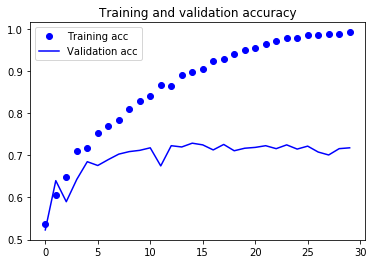

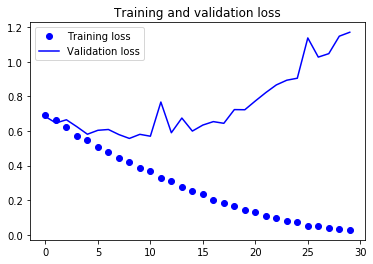

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


이 그래프는 과대적합의 특성을 보여줍니다. 훈련 정확도가 시간이 지남에 따라 선형적으로 증가해서 거의 100%에 도달합니다. 반면 검증 정확도는 70-72%에서 멈추었습니다. 검증 손실은 다섯 번의 에포크만에 최솟값에 다다른 이후에 더 이상 진전되지 않았습니다. 반면 훈련 손실은 거의 0에 도달할 때까지 선형적으로 계속 감소합니다.

비교적 훈련 샘플의 수(2,000개)가 적기 때문에 과대적합이 가장 중요한 문제입니다. 드롭아웃이나 가중치 감소(L2 규제)와 같은 과대적합을 감소시킬 수 있는 여러 가지 기법들을 배웠습니다. 여기에서는 컴퓨터 비전에 특화되어 있어서 딥러닝으로 이미지를 다룰 때 매우 일반적으로 사용되는 새로운 방법인 데이터 증식을 시도해 보겠습니다.

## 데이터 증식 사용하기
과대적합은 학습할 샘플이 너무 적어 새로운 데이터에 일반화할 수 있는 모델을 훈련시킬 수 없기 때문에 발생합니다. 무한히 많은 데이터가 주어지면 데이터 분포의 모든 가능한 측면을 모델이 학습할 수 있을 것입니다. 데이터 증식은 기존의 훈련 샘플로부터 더 많은 훈련 데이터를 생성하는 방법입니다. 이 방법은 그럴듯한 이미지를 생성하도록 여러 가지 랜덤한 변환을 적용하여 샘플을 늘립니다. 훈련 시에 모델이 정확히 같은 데이터를 두 번 만나지 않도록 하는 것이 목표입니다. 모델이 데이터의 여러 측면을 학습하면 일반화에 도움이 될 것입니다.

케라스에서는 ImageDataGenerator가 읽은 이미지에 여러 종류의 랜덤 변환을 적용하도록 설정할 수 있습니다. 예제를 먼저 만들어 보죠:

In [19]:

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

추가적인 매개변수가 몇 개 더 있습니다(케라스 문서를 참고하세요). 이 코드를 간단히 살펴보죠.

 - rotation_range는 랜덤하게 사진을 회전시킬 각도 범위입니다(0-180 사이).
 - width_shift_range와 height_shift_range는 사진을 수평과 수직으로 랜덤하게 평행 이동시킬 범위입니다(전체 넓이와 높이에 대한 비율).
 - shear_range는 랜덤하게 전단 변환을 적용할 각도 범위입니다.
 - zoom_range는 랜덤하게 사진을 확대할 범위입니다.
 - horizontal_flip은 랜덤하게 이미지를 수평으로 뒤집습니다. 수평 대칭을 가정할 수 있을 때 사용합니다(예를 들어, 풍경/인물 사진).
 - fill_mode는 회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략입니다.
 - 증식된 이미지 샘플을 살펴보죠:

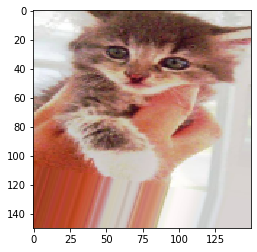

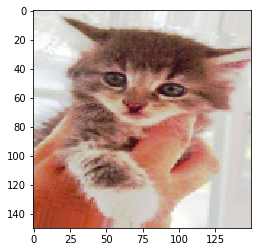

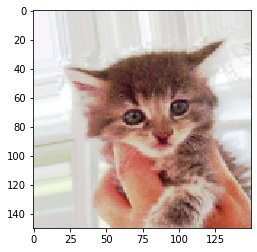

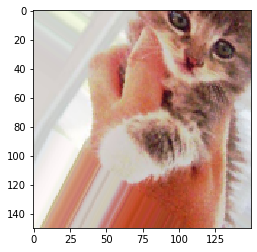

In [20]:

# 이미지 전처리 유틸리티 모듈
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# 증식할 이미지 선택합니다
img_path = fnames[3]

# 이미지를 읽고 크기를 변경합니다
img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) 크기의 넘파이 배열로 변환합니다
x = image.img_to_array(img)

# (1, 150, 150, 3) 크기로 변환합니다
x = x.reshape((1,) + x.shape)

# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성합니다.
# 무한 반복되기 때문에 어느 지점에서 중지해야 합니다!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

데이터 증식을 사용하여 새로운 네트워크를 훈련시킬 때 네트워크에 같은 입력 데이터가 두 번 주입되지 않습니다. 하지만 적은 수의 원본 이미지에서 만들어졌기 때문에 여전히 입력 데이터들 사이에 상호 연관성이 큽니다. 즉, 새로운 정보를 만들어낼 수 없고 단지 기존 정보의 재조합만 가능합니다. 그렇기 때문에 완전히 과대적합을 제거하기에 충분하지 않을 수 있습니다. 과대적합을 더 억제하기 위해 완전 연결 분류기 직전에 Dropout 층을 추가하겠습니다:

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [22]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=32,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 23s 231ms/step - loss: 0.6953 - acc: 0.5122 - val_loss: 0.6866 - val_acc: 0.5920
Epoch 2/100
100/100 [==============================] - 21s 207ms/step - loss: 0.6823 - acc: 0.5500 - val_loss: 0.7049 - val_acc: 0.5026
Epoch 3/100
100/100 [==============================] - 20s 204ms/step - loss: 0.6668 - acc: 0.5903 - val_loss: 0.6523 - val_acc: 0.6212
Epoch 4/100
100/100 [==============================] - 20s 201ms/step - loss: 0.6621 - acc: 0.5913 - val_loss: 0.6458 - val_acc: 0.5999
Epoch 5/100
100/100 [==============================] - 20s 202ms/step - loss: 0.6398 - acc: 0.6234 - val_loss: 0.6174 - val_acc: 0.6472
Epoch 6/100
100/100 [==============================] - 20s 202ms/step - loss: 0.6231 - acc: 0.6531 - val_loss: 0.5965 - val_acc: 0.6785
Epoch 7/100
100/100 [==============================] - 20s 200ms/step - loss: 0.6171 - acc: 0.6475 -

100/100 [==============================] - 21s 213ms/step - loss: 0.4172 - acc: 0.8047 - val_loss: 0.4495 - val_acc: 0.7989
Epoch 61/100
100/100 [==============================] - 22s 219ms/step - loss: 0.4158 - acc: 0.8078 - val_loss: 0.4421 - val_acc: 0.8022
Epoch 62/100
100/100 [==============================] - 22s 224ms/step - loss: 0.4220 - acc: 0.8097 - val_loss: 0.4474 - val_acc: 0.7931
Epoch 63/100
100/100 [==============================] - 22s 216ms/step - loss: 0.4125 - acc: 0.8106 - val_loss: 0.4514 - val_acc: 0.7945
Epoch 64/100
100/100 [==============================] - 22s 215ms/step - loss: 0.4006 - acc: 0.8219 - val_loss: 0.4299 - val_acc: 0.8035
Epoch 65/100
100/100 [==============================] - 21s 214ms/step - loss: 0.4184 - acc: 0.7991 - val_loss: 0.4531 - val_acc: 0.7906
Epoch 66/100
100/100 [==============================] - 21s 213ms/step - loss: 0.4126 - acc: 0.8166 - val_loss: 0.4964 - val_acc: 0.7796
Epoch 67/100
100/100 [==============================] 

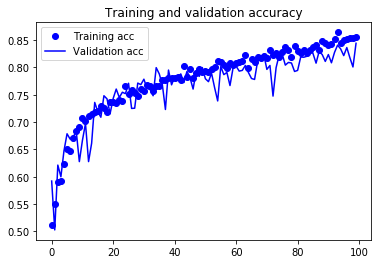

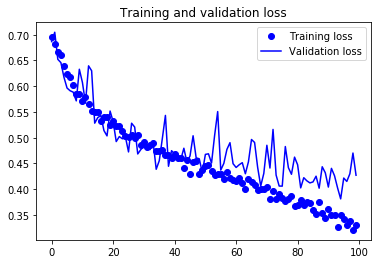

In [23]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

데이터 증식과 드롭아웃 덕택에 더이상 과대적합되지 않습니다. 훈련 곡선이 검증 곡선에 가깝게 따라가고 있습니다. 검증 데이터에서 82% 정확도를 달성하였습니다. 규제하지 않은 모델과 비교했을 때 15% 정도 향상되었습니다.

다른 규제 기법을 더 사용하고 네트워크의 파라미터를 튜닝하면(합성곱 층의 필터 수나 네트워크의 층의 수 등) 86%나 87% 정도까지 더 높은 정확도를 얻을 수도 있습니다. 하지만 데이터가 적기 때문에 컨브넷을 처음부터 훈련해서 더 높은 정확도를 달성하기는 어렵습니다. 이런 상황에서 정확도를 높이기 위한 다음 단계는 사전 훈련된 모델을 사용하는 것입니다. 다음 두 절에서 이에 대해 집중적으로 살펴보겠습니다.

# 사전 훈련된 컨브넷 사용하기

작은 이미지 데이터셋에 딥러닝을 적용하는 일반적이고 매우 효과적인 방법은 사전 훈련된 네트워크를 사용하는 것입니다. 사전 훈련된 네트워크는 일반적으로 대규모 이미지 분류 문제를 위해 대량의 데이터셋에서 미리 훈련되어 저장된 네트워크입니다. 원본 데이터셋이 충분히 크고 일반적이라면 사전 훈련된 네트워크에 의해 학습된 특성의 계층 구조는 실제 세상에 대한 일반적인 모델로 효율적인 역할을 할 수 있습니다. 새로운 문제가 원래 작업과 완전히 다른 클래스에 대한 것이더라도 이런 특성은 많은 컴퓨터 비전 문제에 유용합니다. 예를 들어 (대부분 동물이나 생활 용품으로 이루어진) ImageNet 데이터셋에 네트워크를 훈련합니다. 그다음 이 네트워크를 이미지에서 가구 아이템을 식별하는 것 같은 다른 용도로 사용할 수 있습니다. 학습된 특성을 다른 문제에 적용할 수 있는 이런 유연성은 이전의 많은 얕은 학습 방법과 비교했을 때 딥러닝의 핵심 장점입니다. 이런 방식으로 작은 데이터셋을 가진 문제에도 딥러닝이 효율적으로 작동할 수 있습니다.

여기에서는 (1.4백만 개의 레이블된 이미지와 1,000개의 클래스로 이루어진) ImageNet 데이터셋에서 훈련된 대규모 컨브넷을 사용해 보겠습니다. ImageNet 데이터셋은 다양한 종의 강아지와 고양이를 포함해 많은 동물들을 포함하고 있습니다. 그래서 강아지 vs. 고양이 분류 문제에 좋은 성능을 낼 것 같습니다.

캐런 시몬연과 앤드류 지서먼이 2014년에 개발한 VGG16 구조를 사용하겠습니다. VGG16은 간단하고 ImageNet 데이터셋에 널리 사용되는 컨브넷 구조입니다. VGG16은 조금 오래되었고 최고 수준의 성능에는 못미치며 최근의 다른 모델보다는 조금 무겁습니다. 하지만 이 모델의 구조가 이전에 보았던 것과 비슷해서 새로운 개념을 도입하지 않고 이해하기 쉽기 때문에 선택했습니다. 아마 VGG가 처음 보는 모델 애칭일지 모르겠습니다. 이런 이름에는 VGG, ResNet, Inception, Inception-ResNet, Xception 등이 있습니다. 컴퓨터 비전을 위해 딥러닝을 계속 공부하다보면 이런 이름을 자주 만나게 될 것입니다.

사전 훈련된 네트워크를 사용하는 두 가지 방법이 있습니다. 특성 추출과 미세 조정입니다. 이 두 가지를 모두 다루어 보겠습니다. 먼저 특성 추출부터 시작하죠.

## 특성 추출¶
특성 추출은 사전에 학습된 네트워크의 표현을 사용해 새로운 샘플에서 흥미로운 특성을 뽑아내는 것입니다. 이런 특성을 사용하여 새로운 분류기를 처음부터 훈련합니다.

앞서 보았듯이 컨브넷은 이미지 분류를 위해 두 부분으로 구성됩니다. 먼저 연속된 합성곱과 풀링 층으로 시작해서 완전 연결 분류기로 끝납니다. 첫 번째 부분을 모델의 합성곱 기반층(convolutional base)이라고 부르겠습니다. 컨브넷의 경우 특성 추출은 사전에 훈련된 네트워크의 합성곱 기반층을 선택해 새로운 데이터를 통과시키고 그 출력으로 새로운 분류기를 훈련합니다.

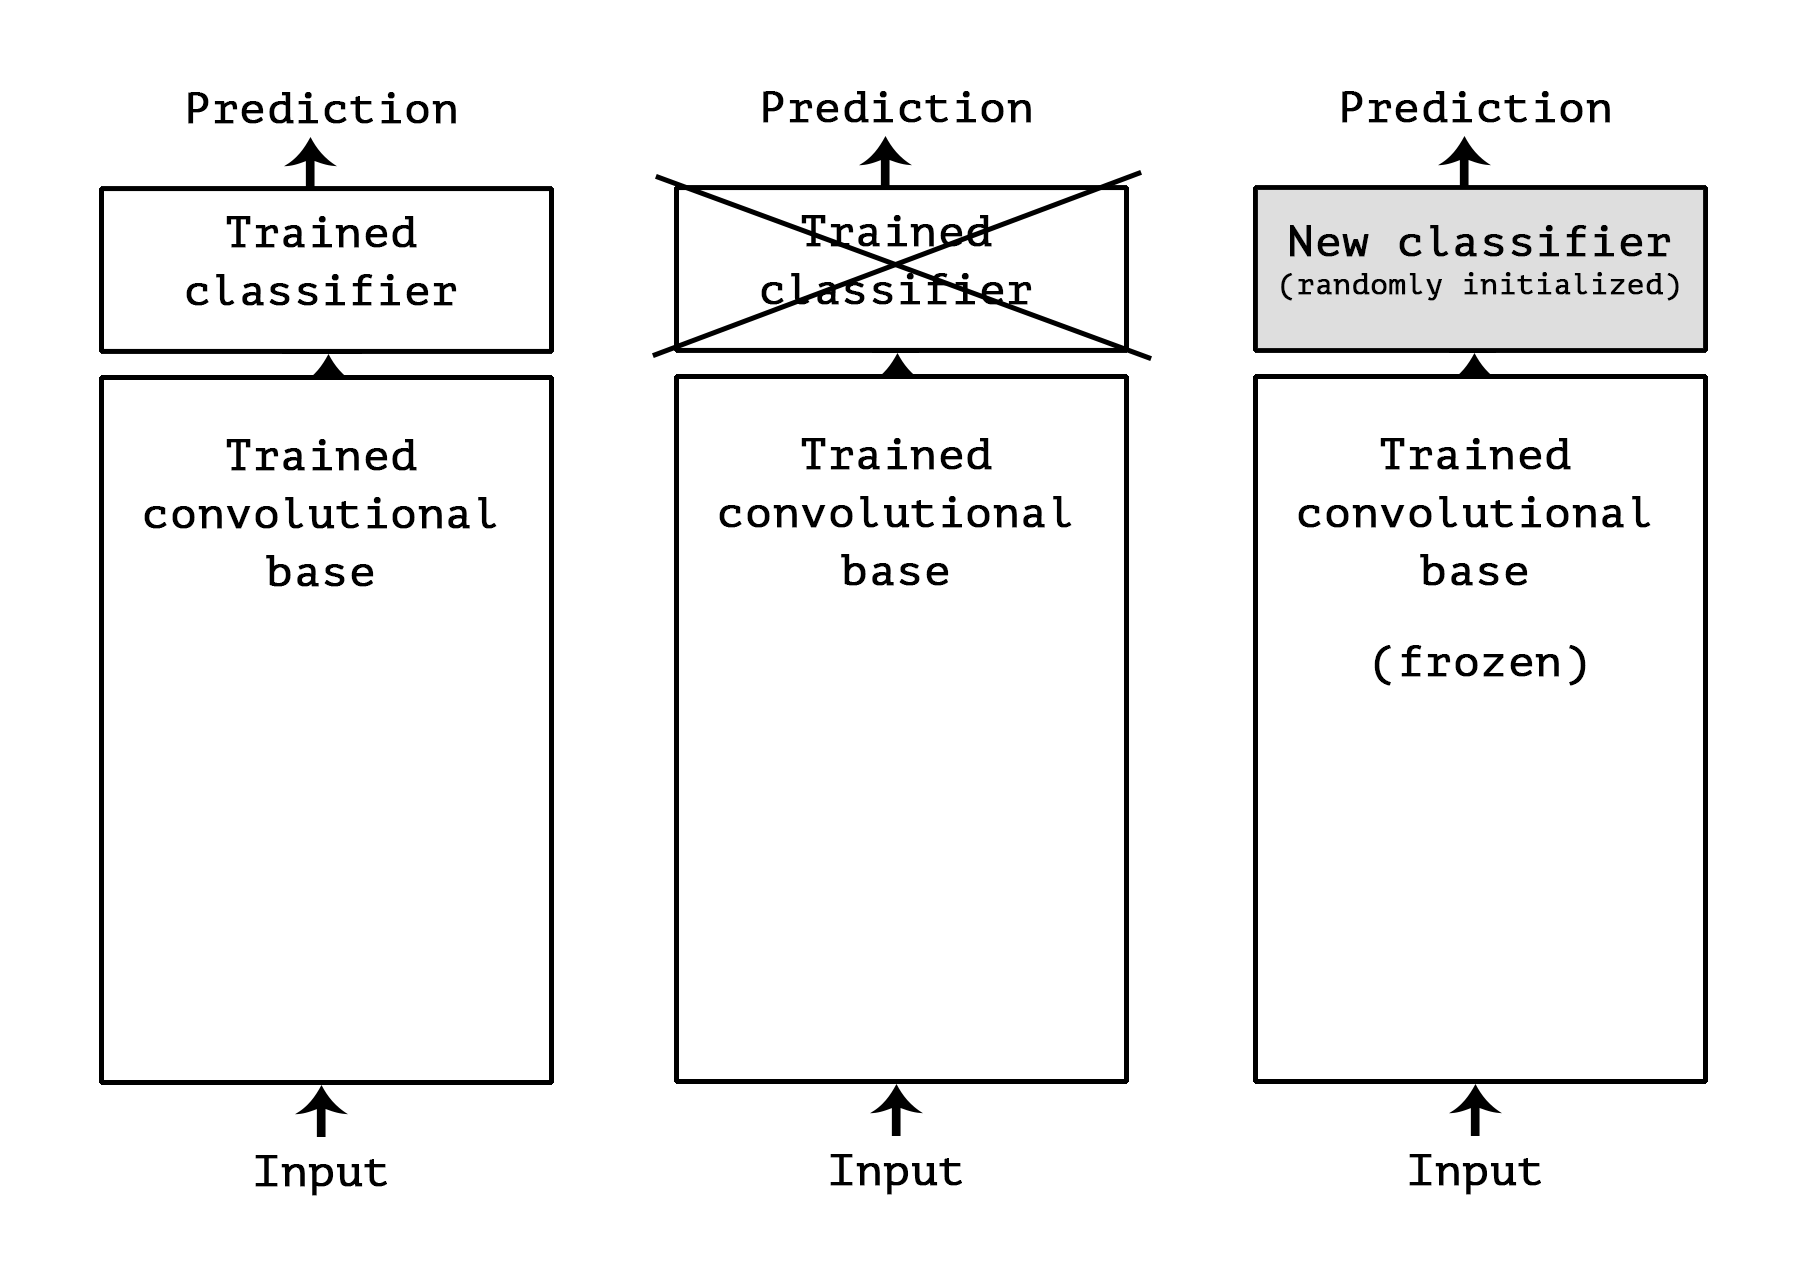

In [24]:
from IPython.display import Image
Image(filename='keras.png') 

왜 합성곱 층만 재사용할까요? 완전 연결 분류기도 재사용할 수 있을까요? 일반적으로 권장하지 않습니다. 합성곱 층에 의해 학습된 표현이 더 일반적이어서 재사용 가능하기 때문입니다. 컨브넷의 특성 맵은 사진에 대한 일반적인 컨셉의 존재 여부를 기록한 맵입니다. 그래서 주어진 컴퓨터 비전 문제에 상관없이 유용하게 사용할 수 있습니다. 하지만 분류기에서 학습한 표현은 모델이 훈련된 클래스 집합에 특화되어 있습니다. 분류기는 전체 사진에 어떤 클래스가 존재할 확률에 관한 정보만을 담고 있습니다. 더군다나 완전 연결 층에서 찾은 표현은 더 이상 입력 이미지에 있는 객체의 위치 정보를 가지고 있지 않습니다. 완전 연결 층들은 공간 개념을 제거하지만 합성곱의 특성 맵은 객체의 위치를 고려합니다. 객체의 위치가 중요한 문제라면 완전 연결 층에서 만든 특성은 크게 쓸모가 없습니다.

특정 합성곱 층에서 추출한 표현의 일반성(그리고 재사용성)의 수준은 모델에 있는 층의 깊이에 달려 있습니다. 모델의 하위 층은 (에지, 색깔, 질감 등과 같이) 지역적이고 매우 일반적인 특성 맵을 추출합니다. 반면 상위 층은 ('강아지 눈'이나 '고양이 귀'와 같이) 좀 더 추상적인 개념을 추출합니다. 만약 새로운 데이터셋이 원본 모델이 훈련한 데이터셋과 많이 다르다면 전체 합성곱 기반층을 사용하는 것보다는 모델의 하위 층 몇 개만 특성 추출에 사용하는 것이 좋습니다.

ImageNet의 클래스 집합에는 여러 종류의 강아지와 고양이를 포함하고 있습니다. 이런 경우 원본 모델의 완전 연결 층에 있는 정보를 재사용하는 것이 도움이 될 것 같습니다. 하지만 새로운 문제의 클래스가 원본 모델의 클래스 집합과 겹치지 않는 좀 더 일반적인 경우를 다루기 위해서 여기서는 완전 연결 층을 사용하지 않겠습니다.

ImageNet 데이터셋에 훈련된 VGG16 네트워크의 합성곱 기반층을 사용하여 강아지와 고양이 이미지에서 유용한 특성을 추출해 보겠습니다. 그런 다음 이 특성으로 강아지 vs. 고양이 분류기를 훈련합니다.

VGG16 모델은 케라스에 패키지로 포함되어 있습니다. keras.applications 모듈에서 임포트할 수 있습니다. keras.applications 모듈에서 사용 가능한 이미지 분류 모델은 다음과 같습니다(모두 ImageNet 데이터셋에서 훈련되었습니다):

- Xception
 - InceptionV3
 - ResNet50
 - VGG16
 - VGG19
 - MobileNet
VGG16 모델을 만들어 보죠:

In [25]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

VGG16 함수에 세 개의 매개변수를 전달합니다:

 - weights는 모델을 초기화할 가중치 체크포인트를 지정합니다.
 - include_top은 네트워크의 최상위 완전 연결 분류기를 포함할지 안할지를 지정합니다. 기본값은 ImageNet의 1,000개의 클래스에 대응되는 완전 연결 분류기를 포함합니다. 별도의 (강아지와 고양이 두 개의 클래스를 구분하는) 완전 연결 층을 추가하려고 하므로 이를 포함시키지 않습니다.
 - input_shape은 네트워크에 주입할 이미지 텐서의 크기입니다. 이 매개변수는 선택사항입니다. 이 값을 지정하지 않으면 네트워크가 어떤 크기의 입력도 처리할 수 있습니다.
 - 다음은 VGG16 합성곱 기반층의 자세한 구조입니다. 이 구조는 앞에서 보았던 간단한 컨브넷과 비슷합니다.

In [26]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

최종 특성 맵의 크기는 (4, 4, 512)입니다. 이 특성 위에 완전 연결 층을 놓을 것입니다. 이 지점에서 두 가지 방식이 가능합니다.

 - 새로운 데이터셋에서 합성곱 기반층을 실행하고 출력을 넘파이 배열로 디스크에 저장합니다. 그다음 이 데이터를 이 책의 1부에서 보았던 것과 비슷한 독립된 완전 연결 분류기에 입력으로 사용합니다. 합성곱 연산은 전체 과정 중에서 가장 비싼 부분입니다. 이 방식은 모든 입력 이미지에 대해 합성곱 기반층을 한 번만 실행하면 되기 때문에 빠르고 비용이 적게 듭니다. 하지만 이런 이유 때문에 이 기법에는 데이터 증식을 사용할 수 없습니다.
 - 준비한 모델(conv_base) 위에 Dense 층을 쌓아 확장합니다. 그다음 입력 데이터에서 엔드 투 엔드로 전체 모델을 실행합니다. 모델에 노출된 모든 입력 이미지가 매번 합성곱 기반층을 통과하기 때문에 데이터 증식을 사용할 수 있습니다. 하지만 이런 이유로 이 방식은 첫 번째 방식보다 훨씬 비용이 많이 듭니다.
 - 두 가지 방식을 모두 다루어 보겠습니다. 첫 번째 방식을 구현하는 코드를 살펴봅니다. conv_base에 데이터를 주입하고 출력을 기록합니다. 이 출력을 새로운 모델의 입력으로 사용하겠습니다.

먼저 앞서 소개한 ImageDataGenerator를 사용해 이미지와 레이블을 넘파이 배열로 추출하겠습니다. conv_base 모델의 predict 메서드를 호출하여 이 이미지에서 특성을 추출합니다.

In [27]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = './dogs-vs-cats/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # 제너레이터는 루프 안에서 무한하게 데이터를 만들어내므로 모든 이미지를 한 번씩 처리하고 나면 중지합니다
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


추출된 특성의 크기는 (samples, 4, 4, 512)입니다. 완전 연결 분류기에 주입하기 위해서 먼저 (samples, 8192) 크기로 펼칩니다:

In [28]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

그러고 나서 완전 연결 분류기를 정의하고(규제를 위해 드롭아웃을 사용합니다) 저장된 데이터와 레이블을 사용해 훈련합니다:

In [29]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 414us/step - loss: 0.5862 - acc: 0.6770 - val_loss: 0.4342 - val_acc: 0.8520
Epoch 2/30
2000/2000 [==============================] - 0s 241us/step - loss: 0.4297 - acc: 0.8060 - val_loss: 0.3568 - val_acc: 0.8830
Epoch 3/30
2000/2000 [==============================] - 1s 252us/step - loss: 0.3586 - acc: 0.8455 - val_loss: 0.3180 - val_acc: 0.8870
Epoch 4/30
2000/2000 [==============================] - 0s 246us/step - loss: 0.3097 - acc: 0.8745 - val_loss: 0.3208 - val_acc: 0.8590
Epoch 5/30
2000/2000 [==============================] - 0s 242us/step - loss: 0.2800 - acc: 0.8850 - val_loss: 0.2835 - val_acc: 0.8970
Epoch 6/30
2000/2000 [==============================] - 0s 235us/step - loss: 0.2546 - acc: 0.8970 - val_loss: 0.2731 - val_acc: 0.8940
Epoch 7/30
2000/2000 [==============================] - 0s 237us/step - loss: 0.2434 - acc: 0.9055 - val_loss: 0.2594 - val_acc: 0.9020
